In [ ]:
# open xlsx file 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
excel_file = "nbac_summarystats_1972_2023_20240530.xlsx"

df = pd.read_excel(excel_file, sheet_name='nbac_1972_2023_20240530')

# drop the first 3 rows and make the 4th row header
df.columns = df.iloc[3]
df = df.drop(index=[0, 1, 2, 3])
df = df.reset_index(drop=True)

# Convert columns to appropriate types
df['YEAR'] = df['YEAR'].astype(int)
df['ADJ_HA'] = df['ADJ_HA'].astype(float)

# make a column for before and after 2006
df['before_after_2006'] = df['YEAR'].apply(lambda x: 'before' if x <= 2006 else 'after')

df.columns


Index(['YEAR', 'NFIREID', 'BASRC', 'FIREMAPS', 'FIREMAPM', 'FIRECAUS',
       'HS_SDATE', 'HS_EDATE', 'AG_SDATE', 'AG_EDATE', 'CAPDATE', 'POLY_HA',
       'ADJ_HA', 'ADJ_FLAG', 'ADMIN_AREA', 'NATPARK', 'PRESCRIBED', 'VERSION',
       'GID', 'before_after_2006'],
      dtype='object', name=3)

In [44]:
import numpy as np

# get data from before 2006
df_before = df[df['before_after_2006'] == 'before']

# percentage of fires less than 100 ha burned
np.mean(df_before['POLY_HA'] < 100)



0.5284302608132189

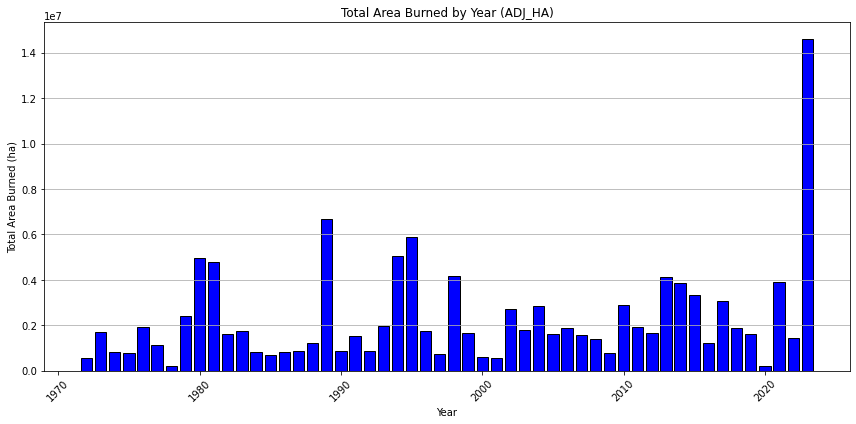

In [ ]:
# make bar graph of total ADJ_HA by year
df_grouped = df.groupby('YEAR')['ADJ_HA'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['YEAR'], df_grouped['ADJ_HA'], color='blue', edgecolor='black')
plt.title("Total Area Burned by Year (ADJ_HA)")
plt.xlabel("Year")
plt.ylabel("Total Area Burned (ha)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


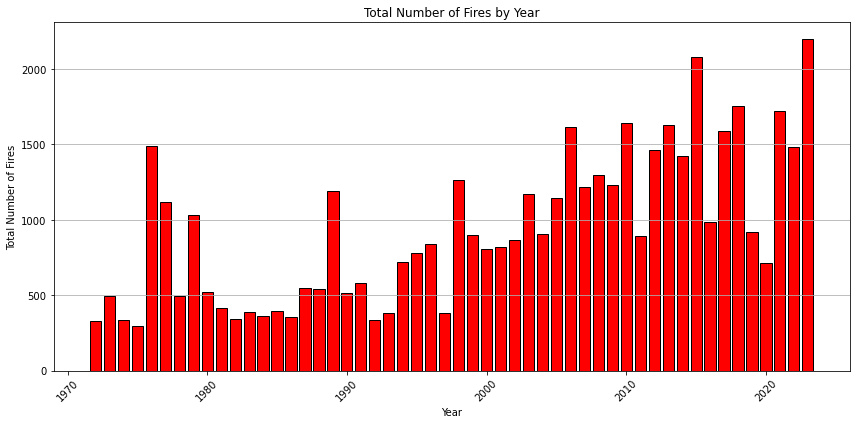

In [9]:
# total number of fires by year
df_grouped = df.groupby('YEAR')['NFIREID'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['YEAR'], df_grouped['NFIREID'], color='red', edgecolor='black')
plt.title("Total Number of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Fires")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

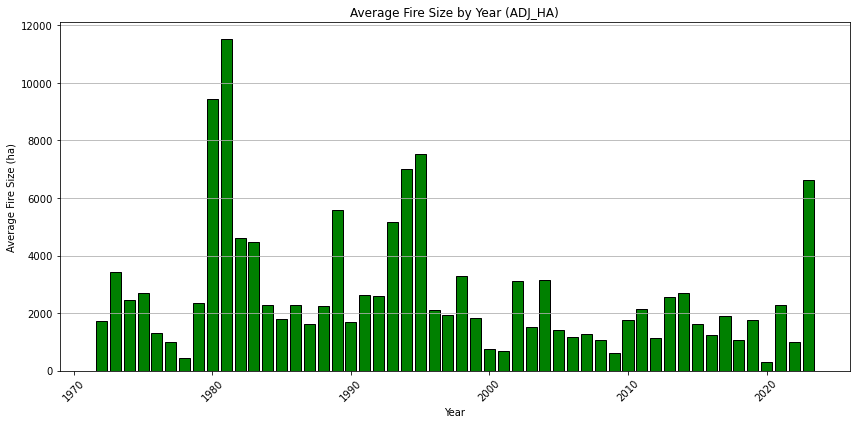

In [10]:
# make a plot average fire size by year
df_grouped = df.groupby('YEAR')['ADJ_HA'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['YEAR'], df_grouped['ADJ_HA'], color='green', edgecolor='black')
plt.title("Average Fire Size by Year (ADJ_HA)")
plt.xlabel("Year")
plt.ylabel("Average Fire Size (ha)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

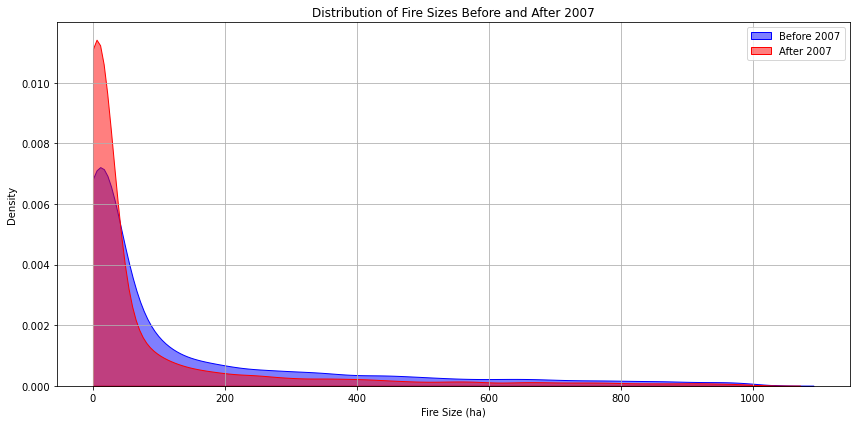

In [34]:
# make a distribution of the fire sizes make two distributions for up to 2006 and after 2007
# make kde overlay
# cut off for only values less than 200000
# restrict distribution to positive
import seaborn as sns
df_before_2007 = df[df['YEAR'] <= 2006]
df_after_2007 = df[df['YEAR'] > 2006]
df_before_2007 = df_before_2007[df_before_2007['ADJ_HA'] < 1000]
df_after_2007 = df_after_2007[df_after_2007['ADJ_HA'] < 1000]
plt.figure(figsize=(12, 6))
sns.kdeplot(df_before_2007['ADJ_HA'], color='blue', label='Before 2007', fill=True, alpha=0.5, clip=(0, None))
sns.kdeplot(df_after_2007['ADJ_HA'], color='red', label='After 2007', fill=True, alpha=0.5, clip=(0, None))
plt.title("Distribution of Fire Sizes Before and After 2007")
plt.xlabel("Fire Size (ha)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



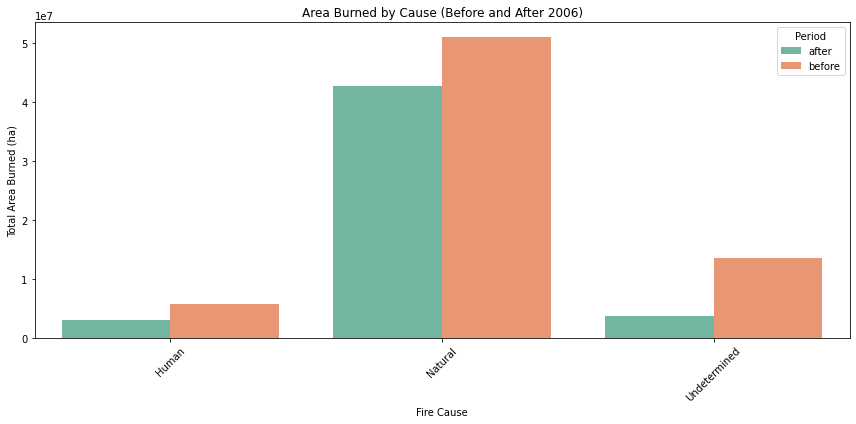

In [38]:
# make a side by side barplot of area burned by cause and split it by before after 2006
df_grouped = df.groupby(['before_after_2006', 'FIRECAUS'])['ADJ_HA'].sum().reset_index()

# Create a side-by-side barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_grouped,
    x='FIRECAUS',
    y='ADJ_HA',
    hue='before_after_2006',
    palette='Set2'
)

# Add titles and labels
plt.title("Area Burned by Cause (Before and After 2006)")
plt.xlabel("Fire Cause")
plt.ylabel("Total Area Burned (ha)")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()





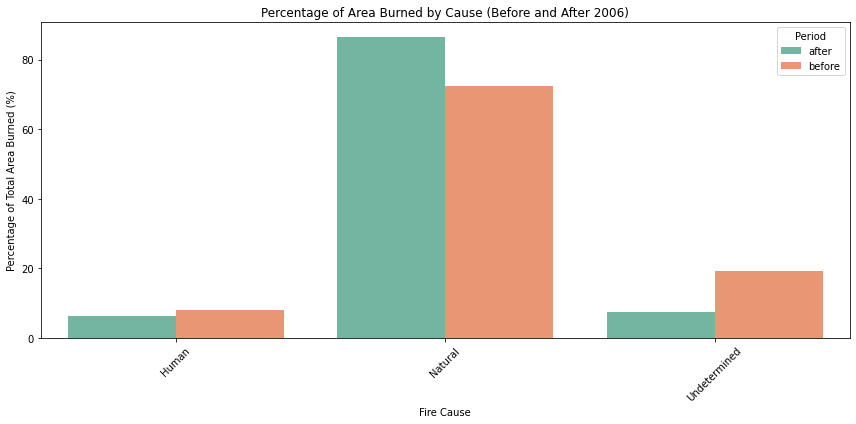

In [40]:
total_by_period = df_grouped.groupby('before_after_2006')['ADJ_HA'].transform('sum')

# Add a new column for percentages
df_grouped['PERCENTAGE'] = (df_grouped['ADJ_HA'] / total_by_period) * 100

# Create a side-by-side barplot with percentages
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_grouped,
    x='FIRECAUS',
    y='PERCENTAGE',
    hue='before_after_2006',
    palette='Set2'
)

# Add titles and labels
plt.title("Percentage of Area Burned by Cause (Before and After 2006)")
plt.xlabel("Fire Cause")
plt.ylabel("Percentage of Total Area Burned (%)")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()

# Show the plot
plt.show()